# Spam-Ham Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Spam_Detector/SMSSpamCollection',delimiter='\t',header=None)

In [3]:
x = df[df[0]=='spam'][1].copy()
for i in range(2):
    print(x[2])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [4]:
df[0].value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [5]:
df.isna().sum()

0    0
1    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Tranforming Text Data

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
x = df[1]
y = df[0]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=31)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_train)

(4179,)
(1393,)
(4179,)
209     You please give us connection today itself bef...
3057                             Webpage s not available!
5201    YOU VE WON! Your 4* Costa Del Sol Holiday or £...
3761                       We'll join the  &lt;#&gt;  bus
1136                      K do I need a login or anything
                              ...                        
826            Hmm .. Bits and pieces lol ... *sighs* ...
3735                    4 tacos + 1 rajas burrito, right?
2942    My supervisor find 4 me one lor i thk his stud...
2064    URGENT! Your mobile No *********** WON a £2,00...
4818    Me too. Mark is taking forever to pick up my p...
Name: 1, Length: 4179, dtype: object


In [9]:
transformer = TfidfVectorizer(lowercase=True,ngram_range=(1,1),norm='l1',strip_accents='ascii',stop_words='english')

In [10]:
x_train_trans = transformer.fit_transform(x_train).toarray()
x_test_trans = transformer.transform(x_test).toarray()

In [11]:
len(transformer.vocabulary_)

7265

In [12]:
print(x_train_trans.shape)
print(x_test_trans.shape)

(4179, 7265)
(1393, 7265)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

2022-07-15 00:23:06.198338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-15 00:23:06.198359: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
def transform(y_val):
    y_new = [1.0 if i=='spam' else 0.0 for i in y_val]
    return y_new

In [15]:
y_train = np.array(transform(y_train))
y_test = np.array(transform(y_test))
print(y_train.shape)

(4179,)


## Model Training:

In [16]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         RandomForestClassifier(),
         KNeighborsClassifier()]

model_titles = ['LogisticRegression','DecisionTree','RandomForest','KNearestNeighbor']

In [17]:
scores_train = []
scores_test = []
for i,model in enumerate(models):
    estimator = model.fit(x_train_trans,y_train)
    y_pred = model.predict(x_test_trans)
    print("Model :",model_titles[i])
    scores_train.append(model.score(x_train_trans,y_train))
    scores_test.append(model.score(x_test_trans,y_test))
    print("train Scores:",model.score(x_train_trans,y_train))
    print("Test Score :",model.score(x_test_trans,y_test))
    print("\n")
    

Model : LogisticRegression
train Scores: 0.8655180665230916
Test Score : 0.8650394831299354


Model : DecisionTree
train Scores: 1.0
Test Score : 0.9669777458722182


Model : RandomForest
train Scores: 1.0
Test Score : 0.9834888729361091


Model : KNearestNeighbor
train Scores: 0.9119406556592486
Test Score : 0.9073941134242641




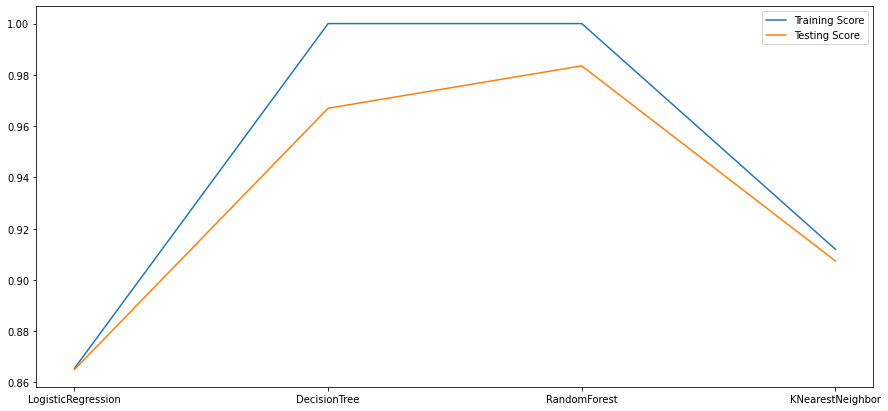

In [18]:
plt.figure(figsize=(15,7))
plt.plot(model_titles,scores_train,label="Training Score")
plt.plot(model_titles,scores_test,label='Testing Score')
plt.legend()
plt.show()

In [19]:
classifier = RandomForestClassifier(min_samples_leaf=1,min_samples_split=5,n_estimators=500,random_state=31)
classifier.fit(x_train_trans,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=31)

In [20]:
print(classifier.score(x_train_trans,y_train))
print(classifier.score(x_test_trans,y_test))

1.0
0.9834888729361091


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [22]:
y_mlp_pred = np.round(classifier.predict(x_test_trans),0)
print(y_test.shape)

(1393,)


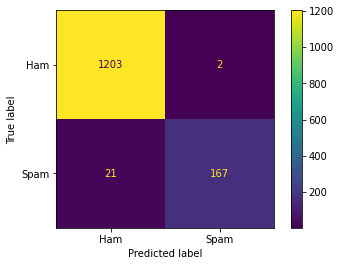

In [23]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_mlp_pred),display_labels=['Ham','Spam']).plot()

In [24]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[x_train_trans.shape[1],],kernel_initializer='uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                465024    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 469,249
Trainable params: 469,249
Non-trainable params: 0
_________________________________________________________________


2022-07-15 00:24:44.279273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 00:24:44.279439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-15 00:24:44.279482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-15 00:24:44.279521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-15 00:24:44.279558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [25]:
model.fit(x_train_trans,y_train,epochs=20,batch_size=128,validation_data=[x_test_trans,y_test])
model.evaluate(x_test_trans,y_test)

Epoch 1/20
33/33 [==============================] - 1s 7ms/step - loss: 0.6628 - accuracy: 0.8555 - val_loss: 0.5899 - val_accuracy: 0.8650
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.8662 - val_loss: 0.3103 - val_accuracy: 0.8650
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.8662 - val_loss: 0.2351 - val_accuracy: 0.8650
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1981 - accuracy: 0.8662 - val_loss: 0.1791 - val_accuracy: 0.8650
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1514 - accuracy: 0.8662 - val_loss: 0.1550 - val_accuracy: 0.8650
Epoch 6/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.8662 - val_loss: 0.1409 - val_accuracy: 0.8650
Epoch 7/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1113 - accuracy: 0.8662 - val_loss: 0.1375 - val_accuracy: 0.8650
Epoch 8/20
33/33 [==

[0.15012843906879425, 0.9705671072006226]

In [26]:
y_mlp_pred = np.round(model.predict(x_test_trans,batch_size=128,verbose=0),0)
print(y_test.shape)
y_mlp_pred[:,0]

(1393,)


array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

MLP Model


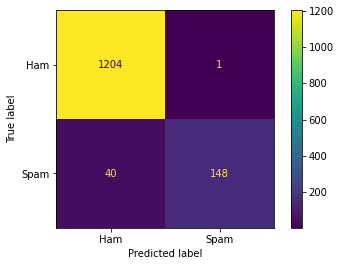

In [27]:
print("MLP Model")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_mlp_pred),display_labels=['Ham','Spam']).plot()

## Conclusion: 

#### MLP Model performs better at classifying all spams messages as spam and classifying minimum not spam messages as spam


#### So MLP is Used for full dataset Training

In [28]:
new_x = np.concatenate([x_train_trans,x_test_trans])
new_y = np.concatenate([y_train,y_test])

In [29]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[x_test_trans.shape[1],],kernel_initializer='uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                465024    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 469,249
Trainable params: 469,249
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(new_x,new_y,epochs=20,batch_size=128)

Epoch 1/20
44/44 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.8658
Epoch 2/20
44/44 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8659
Epoch 3/20
44/44 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.8659
Epoch 4/20
44/44 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.8659
Epoch 5/20
44/44 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.8659
Epoch 6/20
44/44 [==============================] - 0s 3ms/step - loss: 0.1073 - accuracy: 0.9058
Epoch 7/20
44/44 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.9908
Epoch 8/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.9937
Epoch 9/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9952
Epoch 10/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9969
Epoch 11/20
44/44 [

In [35]:
import pickle

In [36]:
pickle.dump(model, open('spam_MLP.sav','wb'))
pickle.dump(transformer, open('spam_tfidf_vect.sav','wb'))

INFO:tensorflow:Assets written to: ram://32fe0c58-e4e0-4ba2-9a31-04c482e91249/assets


In [38]:
# input = ""
# print(predictions(input))